In [1]:
from astropy import constants as cons
from astropy import units as un
import numpy as np
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
import matplotlib.pyplot as plt
import sys
plt.rcParams.update({'font.size': 20})

In [2]:
x1, y1, z1, vx1, vy1, vz1, m1, d1, u1 = np.genfromtxt('Renzo/out0110.sph.ascii', usecols= (0,1,2,3,4,5,6,7,8), unpack=True)
x5, y5, z5, vx5, vy5, vz5, m5, d5, u = np.genfromtxt('v100/out0001.sph.ascii', usecols= (0,1,2,3,4,5,6,7,8), unpack=True)
x10, y10, z10, vx10, vy10, vz10, m10, d10, u10 = np.genfromtxt('v500/out0001.sph.ascii', usecols= (0,1,2,3,4,5,6,7,8), unpack=True)

### 1) Firts idea of cm definition using the most massive particles:

index1 = np.where(m1 == np.amax(m1))[0]
maxmass1 = len(index1)
print(maxmass1)

if maxmass1 == 1:
    xcm1 = x1[np.argmax(m1)]
    ycm1 = y1[np.argmax(m1)]
    zcm1 = z1[np.argmax(m1)]
    
    vcmx1 = vx1[np.argmax(m1)]
    vcmy1 = vy1[np.argmax(m1)]
    vcmz1 = vz1[np.argmax(m1)]
else:
    xcm1 = np.sum(x1[index1]*m1[index1]) / np.sum(m1[index1])
    ycm1 = np.sum(y1[index1]*m1[index1]) / np.sum(m1[index1])
    zcm1 = np.sum(z1[index1]*m1[index1]) / np.sum(m1[index1])
    
    vcmx1 = np.sum(vx1[index1]*m1[index1]) / np.sum(m1[index1])
    vcmy1 = np.sum(vy1[index1]*m1[index1]) / np.sum(m1[index1])
    vcmz1 = np.sum(vz1[index1]*m1[index1]) / np.sum(m1[index1])

index5 = np.where(m5 == np.amax(m5))[0]
maxmass5 = len(index5)
print(maxmass5)

if maxmass5 == 1:
    xcm5 = x5[np.argmax(m5)]
    ycm5 = y5[np.argmax(m5)]
    zcm5 = z5[np.argmax(m5)]
    
    vcmx5 = vx5[np.argmax(m5)]
    vcmy5 = vy5[np.argmax(m5)]
    vcmz5 = vz5[np.argmax(m5)]
else:
    xcm5 = np.sum(x5[index5]*m5[index5]) / np.sum(m5[index5])
    ycm5 = np.sum(y5[index5]*m5[index5]) / np.sum(m5[index5])
    zcm5 = np.sum(z5[index5]*m5[index5]) / np.sum(m5[index5])
    
    vcmx5 = np.sum(vx5[index5]*m5[index5]) / np.sum(m5[index5])
    vcmy5 = np.sum(vy5[index5]*m5[index5]) / np.sum(m5[index5])
    vcmz5 = np.sum(vz5[index5]*m5[index5]) / np.sum(m5[index5])

index10 = np.where(m10 == np.amax(m10))[0]
maxmass10 = len(index10)
print(maxmass10)

if maxmass10 == 1:
    xcm10 = x10[np.argmax(m10)]
    ycm10 = y10[np.argmax(m10)]
    zcm10 = z10[np.argmax(m10)]
    
    vcmx10 = vx10[np.argmax(m10)]
    vcmy10 = vy10[np.argmax(m10)]
    vcmz10 = vz10[np.argmax(m10)]
else:
    xcm10 = np.sum(x10[index10]*m10[index10]) / np.sum(m10[index10])
    ycm10 = np.sum(y10[index10]*m10[index10]) / np.sum(m10[index10])
    zcm10 = np.sum(z10[index10]*m10[index10]) / np.sum(m10[index10])
    
    vcmx10 = np.sum(vx10[index10]*m10[index10]) / np.sum(m10[index10])
    vcmy10 = np.sum(vy10[index10]*m10[index10]) / np.sum(m10[index10])
    vcmz10 = np.sum(vz10[index10]*m10[index10]) / np.sum(m10[index10])

### 2) Second idea of cm definition using the % of the most massive particles:

In [3]:
mass_lims = np.logspace(np.log10(np.amin(m1)),np.log10(np.amax(m1)),100)

In [4]:
cmx = []
vcmx = []
cmy = []
vcmy = []
cmz = []
vcmz = []
Mencl = []
R = []
Mencl_un = []
R_un = []
percent = []

# Unit conversion for the gravitational constant.
G = ((cons.G)/((un.R_sun.to(un.m)**3))*(un.M_sun.to(un.kg))*((1.8845e-2*86400)**2)).value

for i in range(len(mass_lims)):
    
    index1 = np.where(m1 >= mass_lims[i])[0]

    xcm1 = np.sum(x1[index1]*m1[index1]) / np.sum(m1[index1])
    ycm1 = np.sum(y1[index1]*m1[index1]) / np.sum(m1[index1])
    zcm1 = np.sum(z1[index1]*m1[index1]) / np.sum(m1[index1])
    
    vcmx1 = np.sum(vx1[index1]*m1[index1]) / np.sum(m1[index1])
    vcmy1 = np.sum(vy1[index1]*m1[index1]) / np.sum(m1[index1])
    vcmz1 = np.sum(vz1[index1]*m1[index1]) / np.sum(m1[index1])

    cmx.append(xcm1)
    cmy.append(ycm1)
    cmz.append(zcm1)

    vcmx.append(vcmx1)
    vcmy.append(vcmy1)
    vcmz.append(vcmz1)

    #print('The coords of the cm are: x = '+str(xcm1)+'; y = '+str(ycm1)+' and z = '+str(zcm1))
    
    # Calculate the radius and velocity wrt the cm.

    r1 = np.sqrt((x1-xcm1)**2 + (y1-ycm1)**2 + (z1-zcm1)**2)
    v1 = np.sqrt((vx1-vcmx1)**2 + (vy1-vcmy1)**2 + (vz1-vcmz1)**2)

    # Index sorting the radius from lower to higher.

    index = np.argsort(r1)

    # Reordering of all quantities based on Radius.

    X1 = x1[index]
    Y1 = y1[index]
    Z1 = z1[index]

    VX1 = vx1[index]
    VY1 = vy1[index]
    VZ1 = vz1[index]

    R1 = r1[index]
    V1 = v1[index]

    U1 = u1[index]
    M1 = m1[index]

    # Generation of the enclosed mass profile.

    Mencl1 = np.cumsum(M1)
    
    Mencl.append(Mencl1)
    R.append(R1)

    # Energy calculation for the unbound mass criteria.

    E1 = V1**2 + U1 - G*Mencl1/R1
    unb1 = np.where(E1 > 0)[0]

    Munb1 = M1[unb1]
    percent1 = np.sum(Munb1)*100/np.sum(M1)
    
    percent.append(percent1)

    Mencl_un1 = np.cumsum(Munb1)
    R_un1 = R1[unb1]
    
    Mencl_un.append(Mencl_un1)
    R_un.append(R_un1)

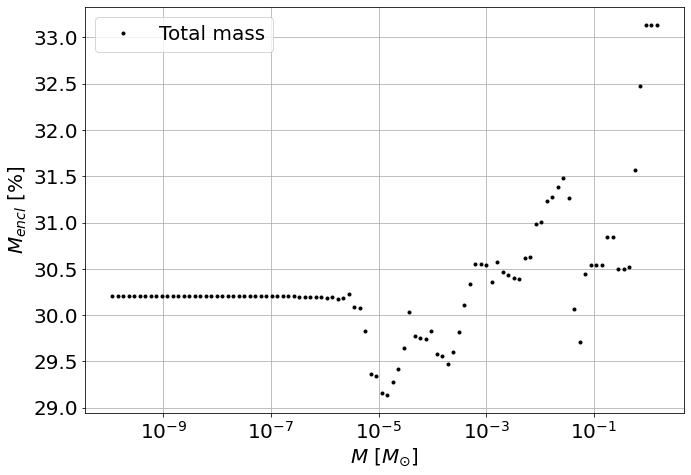

In [5]:
fig = plt.figure(figsize=(10, 7))

plt.plot(mass_lims,percent,'.k', label='Total mass')
plt.xlabel("$M$ [$M_{\odot}$]")
plt.ylabel("$M_{encl}$ [$\%$]")
plt.semilogx()
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

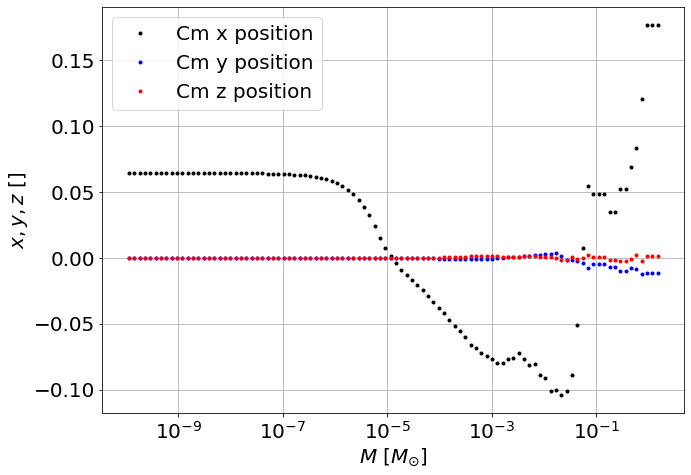

In [6]:
fig = plt.figure(figsize=(10, 7))

plt.plot(mass_lims,cmx,'.k', label='Cm x position')
plt.plot(mass_lims,cmy,'.b', label='Cm y position')
plt.plot(mass_lims,cmz,'.r', label='Cm z position')

plt.xlabel("$M$ [$M_{\odot}$]")
plt.ylabel("$x,y,z$ []")
plt.semilogx()
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

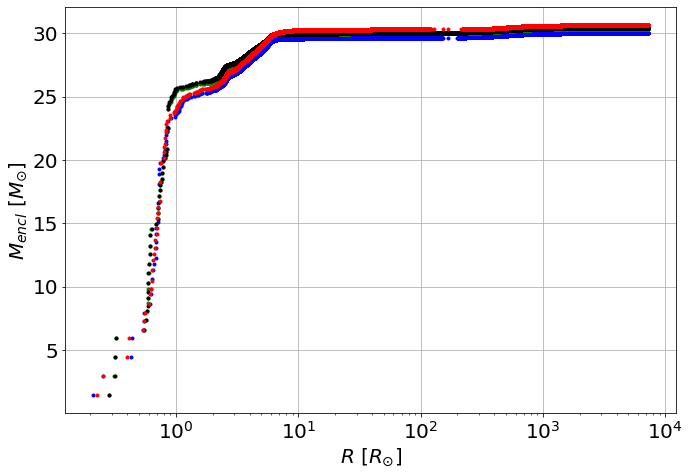

In [7]:
fig = plt.figure(figsize=(10, 7))

#plt.plot(R[0],Mencl[0],'.k', label='Bound mass')
#plt.plot(R[70],Mencl[70],'.k')
#plt.plot(R[75],Mencl[75],'.k')
#plt.plot(R[90],Mencl[90],'.k')

plt.plot(R_un[0],Mencl_un[0],'.b', label='Unbound mass')
plt.plot(R_un[70],Mencl_un[70],'.g')
plt.plot(R_un[75],Mencl_un[75],'.k')
plt.plot(R_un[90],Mencl_un[90],'.r')

plt.xlabel("$R$ [$R_{\odot}$]")
plt.ylabel("$M_{encl}$ [$M_{\odot}$]")
plt.semilogx()
#plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [8]:
den_lims = np.logspace(np.log10(np.amin(d1)),np.log10(np.amax(d1)),100)

In [9]:
cmx = []
vcmx = []
cmy = []
vcmy = []
cmz = []
vcmz = []
Mencl = []
R = []
Mencl_un = []
R_un = []
percent = []

# Unit conversion for the gravitational constant.
G = ((cons.G)/((un.R_sun.to(un.m)**3))*(un.M_sun.to(un.kg))*((1.8845e-2*86400)**2)).value

for i in range(len(den_lims)):
    
    index1 = np.where(d1 >= den_lims[i])[0]

    xcm1 = np.sum(x1[index1]*m1[index1]) / np.sum(m1[index1])
    ycm1 = np.sum(y1[index1]*m1[index1]) / np.sum(m1[index1])
    zcm1 = np.sum(z1[index1]*m1[index1]) / np.sum(m1[index1])
    
    vcmx1 = np.sum(vx1[index1]*m1[index1]) / np.sum(m1[index1])
    vcmy1 = np.sum(vy1[index1]*m1[index1]) / np.sum(m1[index1])
    vcmz1 = np.sum(vz1[index1]*m1[index1]) / np.sum(m1[index1])

    cmx.append(xcm1)
    cmy.append(ycm1)
    cmz.append(zcm1)

    vcmx.append(vcmx1)
    vcmy.append(vcmy1)
    vcmz.append(vcmz1)
    #print('The coords of the cm are: x = '+str(xcm1)+'; y = '+str(ycm1)+' and z = '+str(zcm1))
    
    # Calculate the radius and velocity wrt the cm.

    r1 = np.sqrt((x1-xcm1)**2 + (y1-ycm1)**2 + (z1-zcm1)**2)
    v1 = np.sqrt((vx1-vcmx1)**2 + (vy1-vcmy1)**2 + (vz1-vcmz1)**2)

    # Index sorting the radius from lower to higher.

    index = np.argsort(r1)

    # Reordering of all quantities based on Radius.

    X1 = x1[index]
    Y1 = y1[index]
    Z1 = z1[index]

    VX1 = vx1[index]
    VY1 = vy1[index]
    VZ1 = vz1[index]

    R1 = r1[index]
    V1 = v1[index]

    U1 = u1[index]
    M1 = m1[index]

    # Generation of the enclosed mass profile.

    Mencl1 = np.cumsum(M1)
    
    Mencl.append(Mencl1)
    R.append(R1)

    # Energy calculation for the unbound mass criteria.

    E1 = V1**2 + U1 - G*Mencl1/R1
    unb1 = np.where(E1 > 0)[0]

    Munb1 = M1[unb1]
    percent1 = np.sum(Munb1)*100/np.sum(M1)
    
    percent.append(percent1)

    Mencl_un1 = np.cumsum(Munb1)
    R_un1 = R1[unb1]
    
    Mencl_un.append(Mencl_un1)
    R_un.append(R_un1)

/tmp/ipykernel_18472/1581821537.py:20: RuntimeWarning: invalid value encountered in double_scalars
  xcm1 = np.sum(x1[index1]*m1[index1]) / np.sum(m1[index1])
/tmp/ipykernel_18472/1581821537.py:21: RuntimeWarning: invalid value encountered in double_scalars
  ycm1 = np.sum(y1[index1]*m1[index1]) / np.sum(m1[index1])
/tmp/ipykernel_18472/1581821537.py:22: RuntimeWarning: invalid value encountered in double_scalars
  zcm1 = np.sum(z1[index1]*m1[index1]) / np.sum(m1[index1])
/tmp/ipykernel_18472/1581821537.py:24: RuntimeWarning: invalid value encountered in double_scalars
  vcmx1 = np.sum(vx1[index1]*m1[index1]) / np.sum(m1[index1])
/tmp/ipykernel_18472/1581821537.py:25: RuntimeWarning: invalid value encountered in double_scalars
  vcmy1 = np.sum(vy1[index1]*m1[index1]) / np.sum(m1[index1])
/tmp/ipykernel_18472/1581821537.py:26: RuntimeWarning: invalid value encountered in double_scalars
  vcmz1 = np.sum(vz1[index1]*m1[index1]) / np.sum(m1[index1])


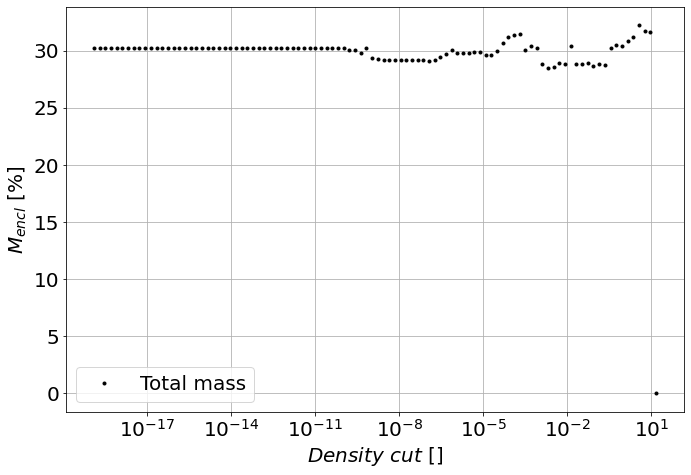

In [10]:
fig = plt.figure(figsize=(10, 7))

plt.plot(den_lims,percent,'.k', label='Total mass')
plt.xlabel("$Density$ $cut$ []")
plt.ylabel("$M_{encl}$ [$\%$]")
plt.semilogx()
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

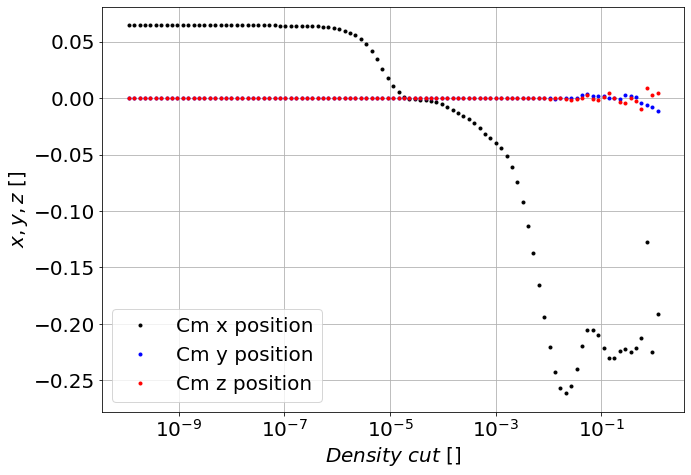

In [11]:
fig = plt.figure(figsize=(10, 7))

plt.plot(mass_lims,cmx,'.k', label='Cm x position')
plt.plot(mass_lims,cmy,'.b', label='Cm y position')
plt.plot(mass_lims,cmz,'.r', label='Cm z position')

plt.xlabel("$Density$ $cut$ []")
plt.ylabel("$x,y,z$ []")
plt.semilogx()
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

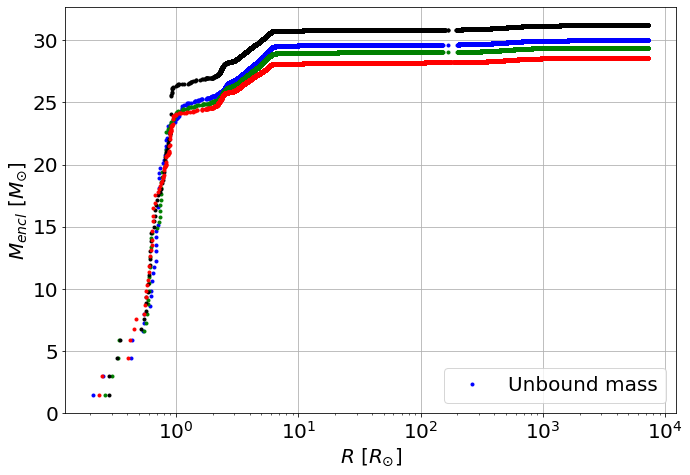

In [12]:
fig = plt.figure(figsize=(10, 7))

#plt.plot(R[0],Mencl[0],'.k', label='Bound mass')
#plt.plot(R[70],Mencl[70],'.k')
#plt.plot(R[75],Mencl[75],'.k')
#plt.plot(R[90],Mencl[90],'.k')

plt.plot(R_un[0],Mencl_un[0],'.b', label='Unbound mass')
plt.plot(R_un[70],Mencl_un[70],'.g')
plt.plot(R_un[75],Mencl_un[75],'.k')
plt.plot(R_un[90],Mencl_un[90],'.r')
plt.xlabel("$R$ [$R_{\odot}$]")
plt.ylabel("$M_{encl}$ [$M_{\odot}$]")
plt.semilogx()
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

index5 = np.where(m5 >= np.amax(m5)*1e-5)[0]

xcm5 = np.sum(x5[index5]*m5[index5]) / np.sum(m5[index5])
ycm5 = np.sum(y5[index5]*m5[index5]) / np.sum(m5[index5])
zcm5 = np.sum(z5[index5]*m5[index5]) / np.sum(m5[index5])
    
vcmx5 = np.sum(vx5[index5]*m5[index5]) / np.sum(m5[index5])
vcmy5 = np.sum(vy5[index5]*m5[index5]) / np.sum(m5[index5])
vcmz5 = np.sum(vz5[index5]*m5[index5]) / np.sum(m5[index5])

print('The coords of the cm are: x = '+str(xcm5)+'; y = '+str(ycm5)+' and z = '+str(zcm5))

index10 = np.where(m10 >= np.amax(m10)*1e-5)[0]

xcm10 = np.sum(x10[index10]*m10[index10]) / np.sum(m10[index10])
ycm10 = np.sum(y10[index10]*m10[index10]) / np.sum(m10[index10])
zcm10 = np.sum(z10[index10]*m10[index10]) / np.sum(m10[index10])
    
vcmx10 = np.sum(vx10[index10]*m10[index10]) / np.sum(m10[index10])
vcmy10 = np.sum(vy10[index10]*m10[index10]) / np.sum(m10[index10])
vcmz10 = np.sum(vz10[index10]*m10[index10]) / np.sum(m10[index10])

print('The coords of the cm are: x = '+str(xcm10)+'; y = '+str(ycm10)+' and z = '+str(zcm10))

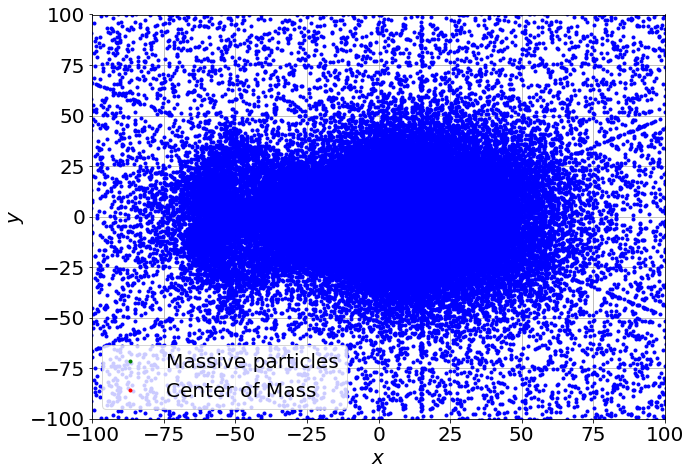

In [13]:
fig = plt.figure(figsize=(10, 7))

plt.plot(x1,y1,'.b')
plt.plot(x1[index1],y1[index1],'.g', label = 'Massive particles')
plt.plot(xcm1,ycm1,'.r', label='Center of Mass')


plt.xlabel("$x$")
plt.ylabel("$y$")
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

NameError: name 'index5' is not defined

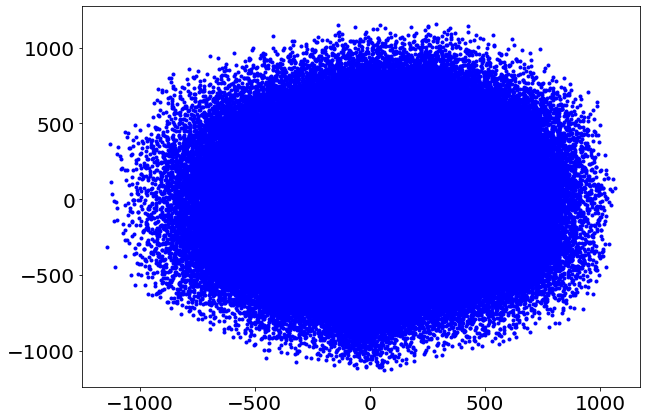

In [14]:
fig = plt.figure(figsize=(10, 7))

plt.plot(x5,y5,'.b')
plt.plot(x5[index5],y5[index5],'.g', label = 'Massive particles')
plt.plot(xcm5,ycm5,'.r', label='Center of Mass')

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.xlim(-150,150)
plt.ylim(-150,150)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=(10, 7))

plt.plot(x10,y10,'.b')
plt.plot(x10[index10],y10[index10],'.g', label = 'Massive particles')
plt.plot(xcm10,ycm10,'.r', label='Center of Mass')

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.xlim(-150,150)
plt.ylim(-150,150)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the radius and velocity wrt the cm.

r1 = np.sqrt((x1-xcm1)**2 + (y1-ycm1)**2 + (z1-zcm1)**2)
v1 = np.sqrt((vx1-vcmx1)**2 + (vy1-vcmy1)**2 + (vz1-vcmz1)**2)

# Index sorting the radius from lower to higher.

index = np.argsort(r1)

# Reordering of all quantities based on Radius.

X1 = x1[index]
Y1 = y1[index]
Z1 = z1[index]

VX1 = vx1[index]
VY1 = vy1[index]
VZ1 = vz1[index]

R1 = r1[index]
V1 = v1[index]

U1 = u1[index]
M1 = m1[index]

# Generation of the enclosed mass profile.

Mencl1 = np.cumsum(M1)

# Unit conversion for the gravitational constant.

G = ((cons.G)/((un.R_sun.to(un.m)**3))*(un.M_sun.to(un.kg))*((1.8845e-2*86400)**2)).value

# Energy calculation for the unbound mass criteria.

E1 = V1**2 + U1 - G*Mencl1/R1
unb1 = np.where(E1 > 0)[0]

Munb1 = M1[unb1]
percent1 = np.sum(Munb1)*100/np.sum(M1)

Mencl_un1 = np.cumsum(Munb1)
R_un1 = R1[unb1]

fig = plt.figure(figsize=(10, 7))

plt.plot(R1,Mencl1,'.k', label='Total mass')
plt.plot(R_un1,Mencl_un1,'.b', label='Unbound mass')
plt.xlabel("$R$ [$R_{\odot}$]")
plt.ylabel("$M_{encl}$ [$M_{\odot}$]")
plt.semilogx()
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the radius and velocity wrt the cm.

r10 = np.sqrt((x10-xcm10)**2 + (y10-ycm10)**2 + (z10-zcm10)**2)
v10 = np.sqrt((vx10-vcmx10)**2 + (vy10-vcmy10)**2 + (vz10-vcmz10)**2)

# Index sorting the radius from lower to higher.

index = np.argsort(r10)

# Reordering of all quantities based on Radius.

X10 = x10[index]
Y10 = y10[index]
Z10 = z10[index]

VX10 = vx10[index]
VY10 = vy10[index]
VZ10 = vz10[index]

R10 = r10[index]
V10 = v10[index]

U10 = u10[index]
M10 = m10[index]

# Generation of the enclosed mass profile.

Mencl10 = np.cumsum(M10)

# Unit conversion for the gravitational constant.

G = ((cons.G)/((un.R_sun.to(un.m)**3))*(un.M_sun.to(un.kg))*((1.8845e-2*86400)**2)).value

# Energy calculation for the unbound mass criteria.

E10 = V10**2 + U10 - G*Mencl10/R10
unb10 = np.where(E10 > 0)[0]

Munb10 = M10[unb10]
percent10 = np.sum(Munb10)*100/np.sum(M10)

Mencl_un10 = np.cumsum(Munb10)
R_un10 = R10[unb10]

fig = plt.figure(figsize=(10, 7))

plt.plot(R10,Mencl10,'.k', label='Total mass')
plt.plot(R_un10,Mencl_un10,'.b', label='Unbound mass')
plt.xlabel("$R$ [$R_{\odot}$]")
plt.ylabel("$M_{encl}$ [$M_{\odot}$]")
plt.semilogx()
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [2]:
per, out = np.genfromtxt('4Myr/Munb_percent.txt', usecols= (0,1), unpack=True)
per2, out2 = np.genfromtxt('4Myr/New_cm/Munb_percent.txt', usecols= (0,1), unpack=True)
per3, out3 = np.genfromtxt('4Myr/New_cm2/Munb_percent.txt', usecols= (0,1), unpack=True)

In [3]:
time = np.linspace(0,1.8445e-02*0.5*len(per),len(per))

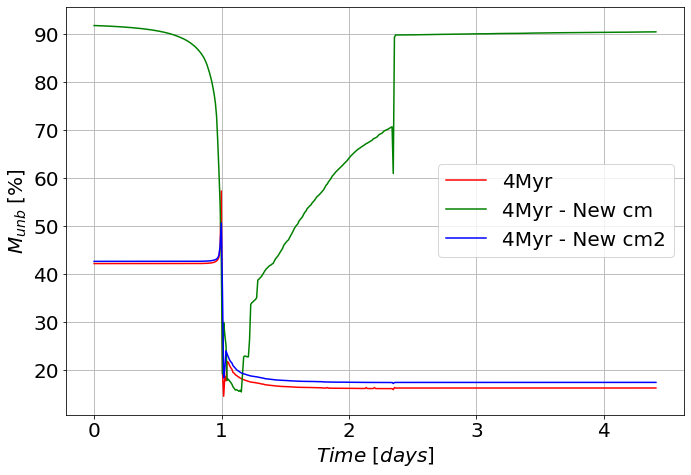

In [4]:
fig = plt.figure(figsize=(10, 7))

plt.plot(time,per,'-r', label = '4Myr')
plt.plot(time,per2,'-g', label = '4Myr - New cm')
plt.plot(time,per3,'-b', label = '4Myr - New cm2')


plt.xlabel("$Time$ $[days]$")
plt.ylabel("$M_{unb}$ $[\%]$")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

In [5]:
perb, outb = np.genfromtxt('b0.1/Munb_percent.txt', usecols= (0,1), unpack=True)
perb2, outb2 = np.genfromtxt('b0.1/New_cm/Munb_percent.txt', usecols= (0,1), unpack=True)

In [6]:
timeb = np.linspace(0,1.8445e-02*0.5*len(perb),len(perb))
timeb2 = np.linspace(0,1.8445e-02*0.5*len(perb2),len(perb2))

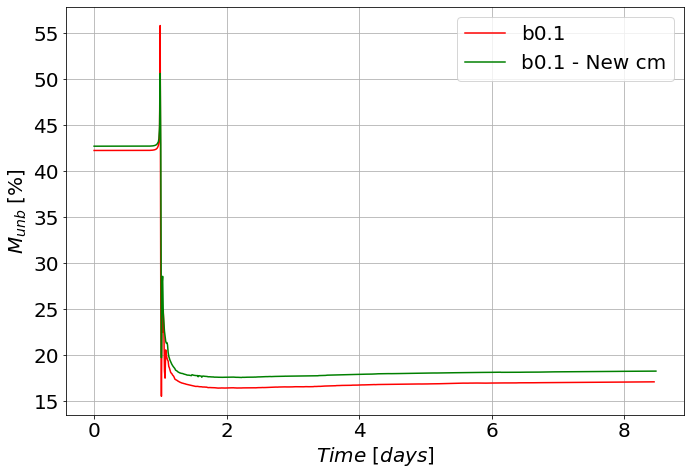

In [7]:
fig = plt.figure(figsize=(10, 7))

plt.plot(timeb,perb,'-r', label = 'b0.1')
plt.plot(timeb2,perb2,'-g', label = 'b0.1 - New cm')

plt.xlabel("$Time$ $[days]$")
plt.ylabel("$M_{unb}$ $[\%]$")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
perR, outR = np.genfromtxt('Renzo/Munb_percent.txt', usecols= (0,1), unpack=True)
perR2, outR2 = np.genfromtxt('Renzo/New_cm/Munb_percent.txt', usecols= (0,1), unpack=True)
perR3, outR3 = np.genfromtxt('Renzo/New_E/Munb_percent.txt', usecols= (0,1), unpack=True)
perR4, outR4 = np.genfromtxt('Renzo/New_R/Munb_percent.txt', usecols= (0,1), unpack=True)

In [9]:
timeR = np.linspace(0,1.8445e-02*0.5*len(perR),len(perR))
timeR2 = np.linspace(0,1.8445e-02*0.5*len(perR2),len(perR2))
timeR3 = np.linspace(0,1.8445e-02*0.5*len(perR3),len(perR3))
timeR4 = np.linspace(0,1.8445e-02*0.5*len(perR4),len(perR4))

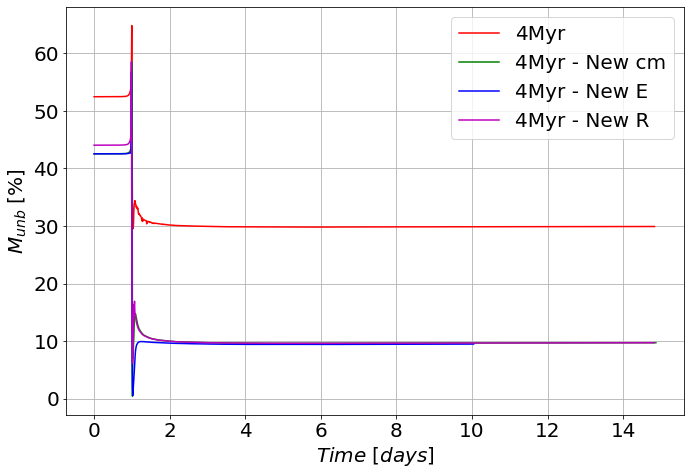

In [10]:
fig = plt.figure(figsize=(10, 7))

plt.plot(timeR,perR,'-r', label = '4Myr')
plt.plot(timeR2,perR2,'-g', label = '4Myr - New cm')
plt.plot(timeR3,perR3,'-b', label = '4Myr - New E')
plt.plot(timeR4,perR4,'-m', label = '4Myr - New R')

plt.xlabel("$Time$ $[days]$")
plt.ylabel("$M_{unb}$ $[\%]$")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
perb0, outb0 = np.genfromtxt('b0.1/New_R/Munb_percent.txt', usecols= (0,1), unpack=True)

perb, outb = np.genfromtxt('b1/Munb_percent.txt', usecols= (0,1), unpack=True)
perb2, outb2 = np.genfromtxt('b1/New_cm/Munb_percent.txt', usecols= (0,1), unpack=True)
perb3, outb3 = np.genfromtxt('b1/New_R/Munb_percent.txt', usecols= (0,1), unpack=True)

In [12]:
perv, outv = np.genfromtxt('v100/New_R/Munb_percent.txt', usecols= (0,1), unpack=True)
perv5, outv5 = np.genfromtxt('v500/New_R/Munb_percent.txt', usecols= (0,1), unpack=True)

In [13]:
perM, outM = np.genfromtxt('4Myr/New_R/Munb_percent.txt', usecols= (0,1), unpack=True)

In [17]:
timeb0 = np.linspace(0,1.8445e-02*0.5*len(perb0),len(perb0))
timeb = np.linspace(0,1.8445e-02*0.5*len(perb),len(perb))
timeb2 = np.linspace(0,1.8445e-02*0.5*len(perb2),len(perb2))
timeb3 = np.linspace(0,1.8445e-02*0.5*len(perb3),len(perb3))

timev = np.linspace(0,1.8445e-02*0.5*len(perv),len(perv))
timev5 = np.linspace(0,1.8445e-02*0.5*len(perv5),len(perv5))
timeM = np.linspace(0,1.8445e-02*0.5*len(perM),len(perM))

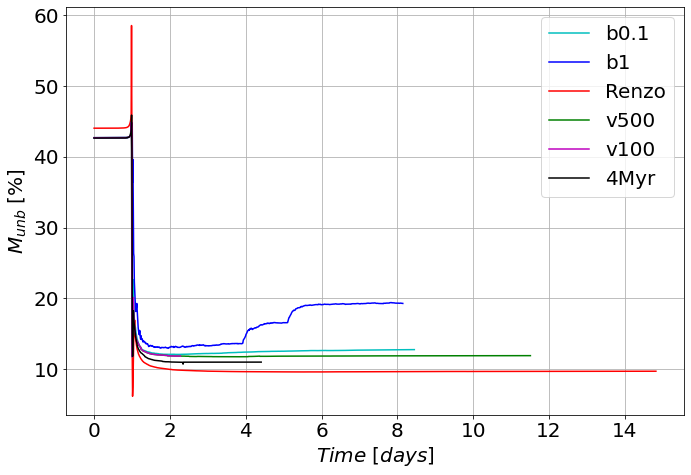

In [19]:
fig = plt.figure(figsize=(10, 7))

plt.plot(timeb0,perb0,'-c', label = 'b0.1')
plt.plot(timeb3,perb3,'-b', label = 'b1')
plt.plot(timeR4,perR4,'-r', label = 'Renzo')
plt.plot(timev5[:-1],perv5[:-1],'-g', label = 'v500')
plt.plot(timev[:-1],perv[:-1],'-m', label = 'v100')
plt.plot(timeM,perM,'-k', label = '4Myr')


plt.xlabel("$Time$ $[days]$")
plt.ylabel("$M_{unb}$ $[\%]$")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()